# **TRABALHO 01: Sistema de Loja de Roupas & Calçados: Moda Mania - Grupo 5 (Alex Rossoni, João Pedro Pagotto, Sofia de Alcantara, Thiago Carvalho, Wal Candeia)**
- Acesse o repositório no GitHub [aqui](https://github.com/sofialctv/ModaMania).


In [ ]:
!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
import warnings

warnings.filterwarnings('ignore')

run = psycopg2.connect(host = "pg-3280faa6-bd20241.d.aivencloud.com",
                       user = "avnadmin",
                       password = "AVNS_az1_T3HPrcMDdmihtmv",
                       port = "10341",
                       database = "defaultdb")
run
cur = run.cursor()

In [ ]:
def execute_query(query):
    return pd.read_sql_query(query, run)

# 1. **Relatório de Vendas por Categoria e Subcategoria**
Este relatório exibirá o total de vendas (valor) para cada categoria (roupa ou calçado). Informações incluídas: Categoria, Valor Total Vendido.

In [ ]:
query_vendas_categoria = """
SELECT
    categoria.descricao AS categoria,
    subcategoria.descricao AS subcategoria,
    SUM(compra_item.quantidade) AS quantidade_vendida,
    SUM(compra_item.valor * compra_item.quantidade) AS valor_total_vendido,
    compra.data_compra
FROM
    produto
JOIN categoria ON produto.fk_categoria_codigo = categoria.codigo
JOIN subcategoria ON produto.fk_subcategoria_codigo = subcategoria.codigo
JOIN compra_item ON produto.codigo = compra_item.fk_produto_codigo
JOIN compra ON compra_item.fk_compra_codigo = compra.codigo
GROUP BY
    categoria.descricao,
    subcategoria.descricao,
    compra.data_compra
ORDER BY
    categoria.descricao,
    subcategoria.descricao,
    compra.data_compra;

"""

df_vendas_categoria = execute_query(query_vendas_categoria)
print(df_vendas_categoria)

   categoria subcategoria  quantidade_vendida  valor_total_vendido data_compra
0    Calçado     Feminino                   1               3100.0  2023-02-18
1    Calçado     Feminino                   1               2900.0  2023-03-29
2    Calçado     Feminino                   1               3150.0  2024-05-25
3    Calçado     Feminino                   1               2950.0  2024-06-13
4    Calçado    Masculino                   1               5500.0  2022-12-31
5    Calçado    Masculino                   1               2300.0  2023-01-12
6    Calçado    Masculino                   1               5550.0  2024-03-18
7    Calçado    Masculino                   1               2350.0  2024-04-06
8      Roupa     Feminino                   2               9600.0  2022-01-05
9      Roupa     Feminino                   2              16100.0  2022-02-15
10     Roupa     Feminino                   2               8200.0  2022-05-10
11     Roupa     Feminino                   1       

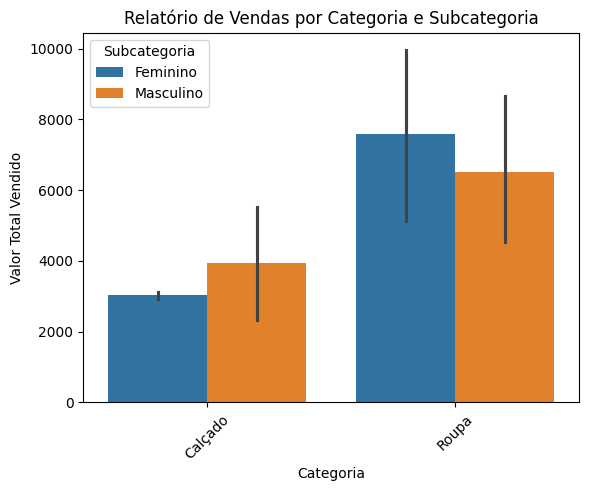

In [ ]:
sns.barplot(data=df_vendas_categoria, x='categoria', y='valor_total_vendido', hue='subcategoria')
plt.title('Relatório de Vendas por Categoria e Subcategoria')
plt.xlabel('Categoria')
plt.ylabel('Valor Total Vendido')
plt.xticks(rotation=45)
plt.legend(title='Subcategoria')
plt.show()

# 2. **Relatório de Estoque**
Este relatório apresentará a quantidade atual de cada produto em estoque, categorizado por tamanho. Informações incluídas:Nome do Produto, Tamanho, Quantidade em Estoque.

In [ ]:
query_estoque = """
SELECT
    produto.codigo AS codigo_produto,
    produto.descricao AS nome_produto,
    tamanho.descricao AS tamanho,
    cor.descricao AS cor,
    publico_alvo.descricao AS publico_alvo,
    subcategoria.descricao AS genero,
    estoque.quantidade AS quantidade_estoque,
    produto.preco
FROM
    produto
JOIN tamanho ON produto.fk_tamanho_codigo = tamanho.codigo
JOIN cor ON produto.fk_cor_codigo = cor.codigo
JOIN publico_alvo ON produto.fk_publico_alvo_codigo = publico_alvo.codigo
JOIN subcategoria ON produto.fk_subcategoria_codigo = subcategoria.codigo
JOIN estoque ON produto.codigo = estoque.fk_produto_codigo
ORDER BY
    produto.codigo;
"""
df_estoque = execute_query(query_estoque)
print(df_estoque)

    codigo_produto nome_produto   tamanho       cor publico_alvo     genero  \
0                1      Vestido         G  Vermelho       Adulto   Feminino   
1                2        Blusa         P      Azul       Adulto   Feminino   
2                3       Camisa        PP     Verde       Adulto  Masculino   
3                4      Moletom         G   Amarelo     Infantil  Masculino   
4                5       Casaco         G     Preto       Adulto   Feminino   
5                6      Jaqueta         M    Branco     Infantil   Feminino   
6                7         Saia        GG     Cinza       Adulto   Feminino   
7                8        Short         M      Rosa     Infantil  Masculino   
8                9      Bermuda         M    Marrom     Infantil  Masculino   
9               10        Calça         P      Bege     Infantil  Masculino   
10              11  Calça Jeans         P  Vermelho     Infantil  Masculino   
11              12         Bota  Infantil      Azul 

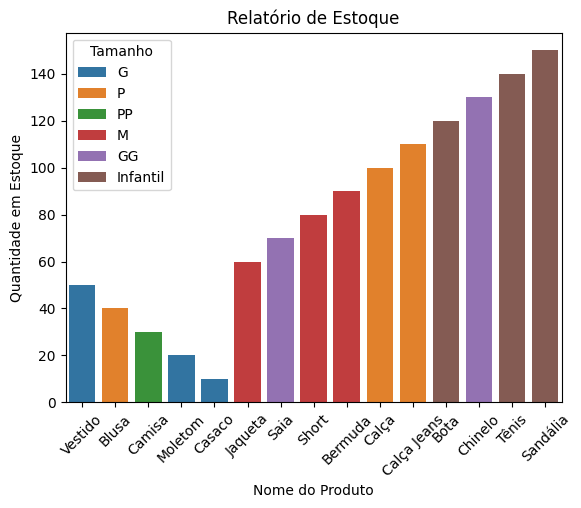

In [ ]:
sns.barplot(data=df_estoque, x='nome_produto', y='quantidade_estoque', hue='tamanho')
plt.title('Relatório de Estoque')
plt.xlabel('Nome do Produto')
plt.ylabel('Quantidade em Estoque')
plt.xticks(rotation=45)
plt.legend(title='Tamanho')
plt.show()

# 3. **Relatório de Compras por Cliente**
Este relatório listará todas as compras realizadas por cada cliente, incluindo os valores totais das compras de cada cliente. Informações incluídas: Nome do Cliente, Valor Total da Compra.

In [ ]:
compras_cliente_query = """
SELECT
    cliente.codigo AS cliente_codigo,
    cliente.nome AS cliente_nome,
    compra.codigo AS compra_codigo,
    compra.data_compra,
    SUM(compra_item.valor * compra_item.quantidade) AS valor_total
FROM
    cliente
JOIN
    compra ON cliente.codigo = compra.fk_cliente_codigo
JOIN
    compra_item ON compra.codigo = compra_item.fk_compra_codigo
GROUP BY
    cliente.codigo, cliente.nome, compra.codigo, compra.data_compra
ORDER BY
    cliente.codigo, compra.data_compra;
"""

compras_cliente_df = pd.read_sql_query(compras_cliente_query, run)
print(compras_cliente_df.head())

   cliente_codigo cliente_nome  compra_codigo data_compra  valor_total
0               1   João Silva              1  2022-01-05       9600.0
1               1   João Silva             11  2022-11-24       4500.0
2               1   João Silva             21  2023-09-09       2800.0
3               2  Maria Souza              2  2022-02-15      16100.0
4               2  Maria Souza             12  2022-12-31       5500.0


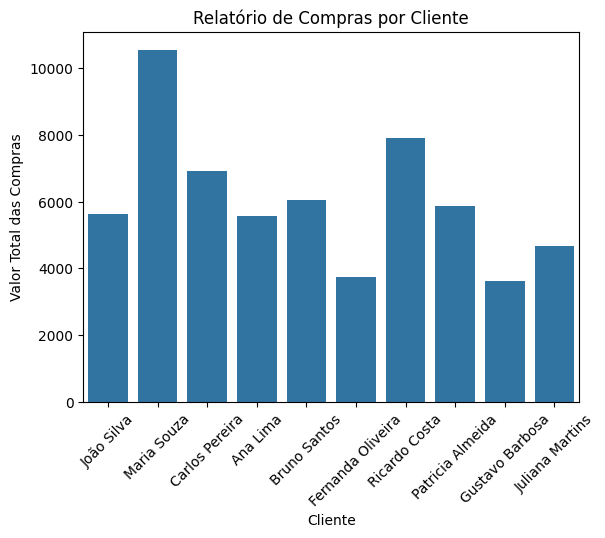

In [ ]:
sns.barplot(x="cliente_nome", y="valor_total", data=compras_cliente_df, ci=None)
plt.xticks(rotation=45)
plt.title("Relatório de Compras por Cliente")
plt.xlabel("Cliente")
plt.ylabel("Valor Total das Compras")
plt.show()

# 4. **Relatório de Pagamentos e Inadimplência**
Este relatório mostrará o status dos pagamentos realizados pelos clientes, destacando os pagamentos em andamento,pagos e atrasados. Informações incluídas: Status do Pagamento,.

In [ ]:
query_pagamentos_inadimplencia = """
SELECT
    pagamento.codigo AS pagamento_codigo,
    pagamento.fk_compra_codigo,
    pagamento.data_pagamento,
    pagamento.data_vencimento,
    pagamento.valor,
    metodo_pagamento.descricao AS metodo_pagamento,
    status_pagamento.descricao AS status_pagamento,
    cliente.codigo AS cliente_codigo,
    cliente.nome AS cliente_nome
FROM
    pagamento
JOIN
    compra ON pagamento.fk_compra_codigo = compra.codigo
JOIN
    cliente ON compra.fk_cliente_codigo = cliente.codigo
JOIN
    metodo_pagamento ON pagamento.fk_metodo_pagamento_codigo = metodo_pagamento.codigo
JOIN
    status_pagamento ON pagamento.fk_status_pagamento_codigo = status_pagamento.codigo
ORDER BY
    cliente.codigo, pagamento.data_vencimento;
"""

df_pagamentos_inadimplencia = execute_query(query_pagamentos_inadimplencia)
print(df_pagamentos_inadimplencia)

    pagamento_codigo  fk_compra_codigo data_pagamento data_vencimento  \
0                  1                 1     2022-02-05      2022-02-05   
1                 11                11     2023-01-10      2023-01-10   
2                 21                21     2023-11-30      2023-11-30   
3                 31                31     2024-09-09      2024-09-09   
4                  2                 2     2022-03-12      2022-03-12   
5                 12                12     2023-02-25      2023-02-25   
6                 22                22     2023-12-07      2023-12-07   
7                 32                32     2024-10-22      2024-10-22   
8                  3                 3     2022-04-19      2022-04-19   
9                 13                13     2023-03-05      2023-03-05   
10                23                23     2024-01-16      2024-01-16   
11                33                33     2024-11-05      2024-11-05   
12                 4                 4     2022-05-

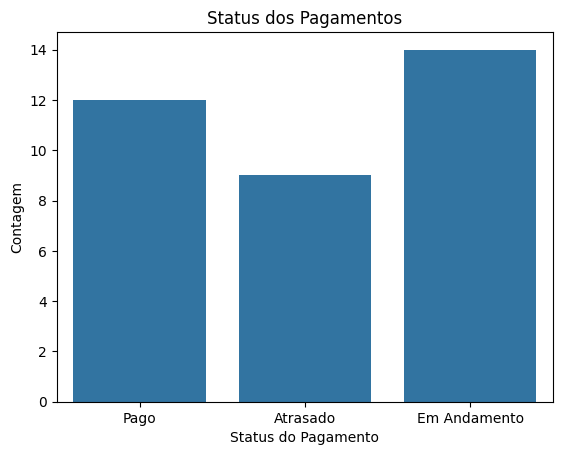

In [ ]:
sns.countplot(x="status_pagamento", data=df_pagamentos_inadimplencia)
plt.title("Status dos Pagamentos")
plt.xlabel("Status do Pagamento")
plt.ylabel("Contagem")
plt.show()

# 5. **Relatório de Desempenho de Vendas por Período**
Este relatório fornecerá uma análise das vendas em diferentes períodos. Informações incluídas: Período, Valor Total Vendido, Categoria.

In [ ]:
query_desempenho_vendas_periodo = """
SELECT
    categoria.descricao AS categoria,
    subcategoria.descricao AS subcategoria,
    SUM(compra_item.quantidade) AS quantidade_vendida,
    SUM(compra_item.valor * compra_item.quantidade) AS valor_total_vendido,
    compra.data_compra
FROM
    produto
JOIN categoria ON produto.fk_categoria_codigo = categoria.codigo
JOIN subcategoria ON produto.fk_subcategoria_codigo = subcategoria.codigo
JOIN compra_item ON produto.codigo = compra_item.fk_produto_codigo
JOIN compra ON compra_item.fk_compra_codigo = compra.codigo
GROUP BY
    categoria.descricao,
    subcategoria.descricao,
    compra.data_compra
ORDER BY
    categoria.descricao,
    subcategoria.descricao,
    compra.data_compra;

"""

df_desempenho_vendas_periodo = execute_query(query_vendas_categoria)
print(df_desempenho_vendas_periodo)

   categoria subcategoria  quantidade_vendida  valor_total_vendido data_compra
0    Calçado     Feminino                   1               3100.0  2023-02-18
1    Calçado     Feminino                   1               2900.0  2023-03-29
2    Calçado     Feminino                   1               3150.0  2024-05-25
3    Calçado     Feminino                   1               2950.0  2024-06-13
4    Calçado    Masculino                   1               5500.0  2022-12-31
5    Calçado    Masculino                   1               2300.0  2023-01-12
6    Calçado    Masculino                   1               5550.0  2024-03-18
7    Calçado    Masculino                   1               2350.0  2024-04-06
8      Roupa     Feminino                   2               9600.0  2022-01-05
9      Roupa     Feminino                   2              16100.0  2022-02-15
10     Roupa     Feminino                   2               8200.0  2022-05-10
11     Roupa     Feminino                   1       

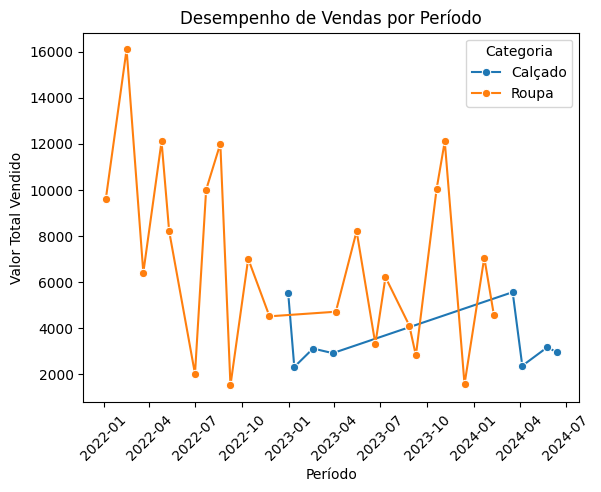

In [ ]:
sns.lineplot(x="data_compra", y="valor_total_vendido", hue="categoria", data=df_desempenho_vendas_periodo, marker="o")
plt.title("Desempenho de Vendas por Período")
plt.xlabel("Período")
plt.ylabel("Valor Total Vendido")
plt.legend(title="Categoria")
plt.xticks(rotation=45)
plt.show()